In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import pickle

Get filenames

In [2]:
base_path = "G:\\Data\\Projects\\NbSe2\\AC studies\\"
hechos_OOC_paths = glob.glob(base_path + "Set C\\*_OOC*_pulsed_measurement.dat")
hechos_IC_paths = glob.glob(base_path + "Set C\\*_IC*_pulsed_measurement.dat")

Analyse HEcho

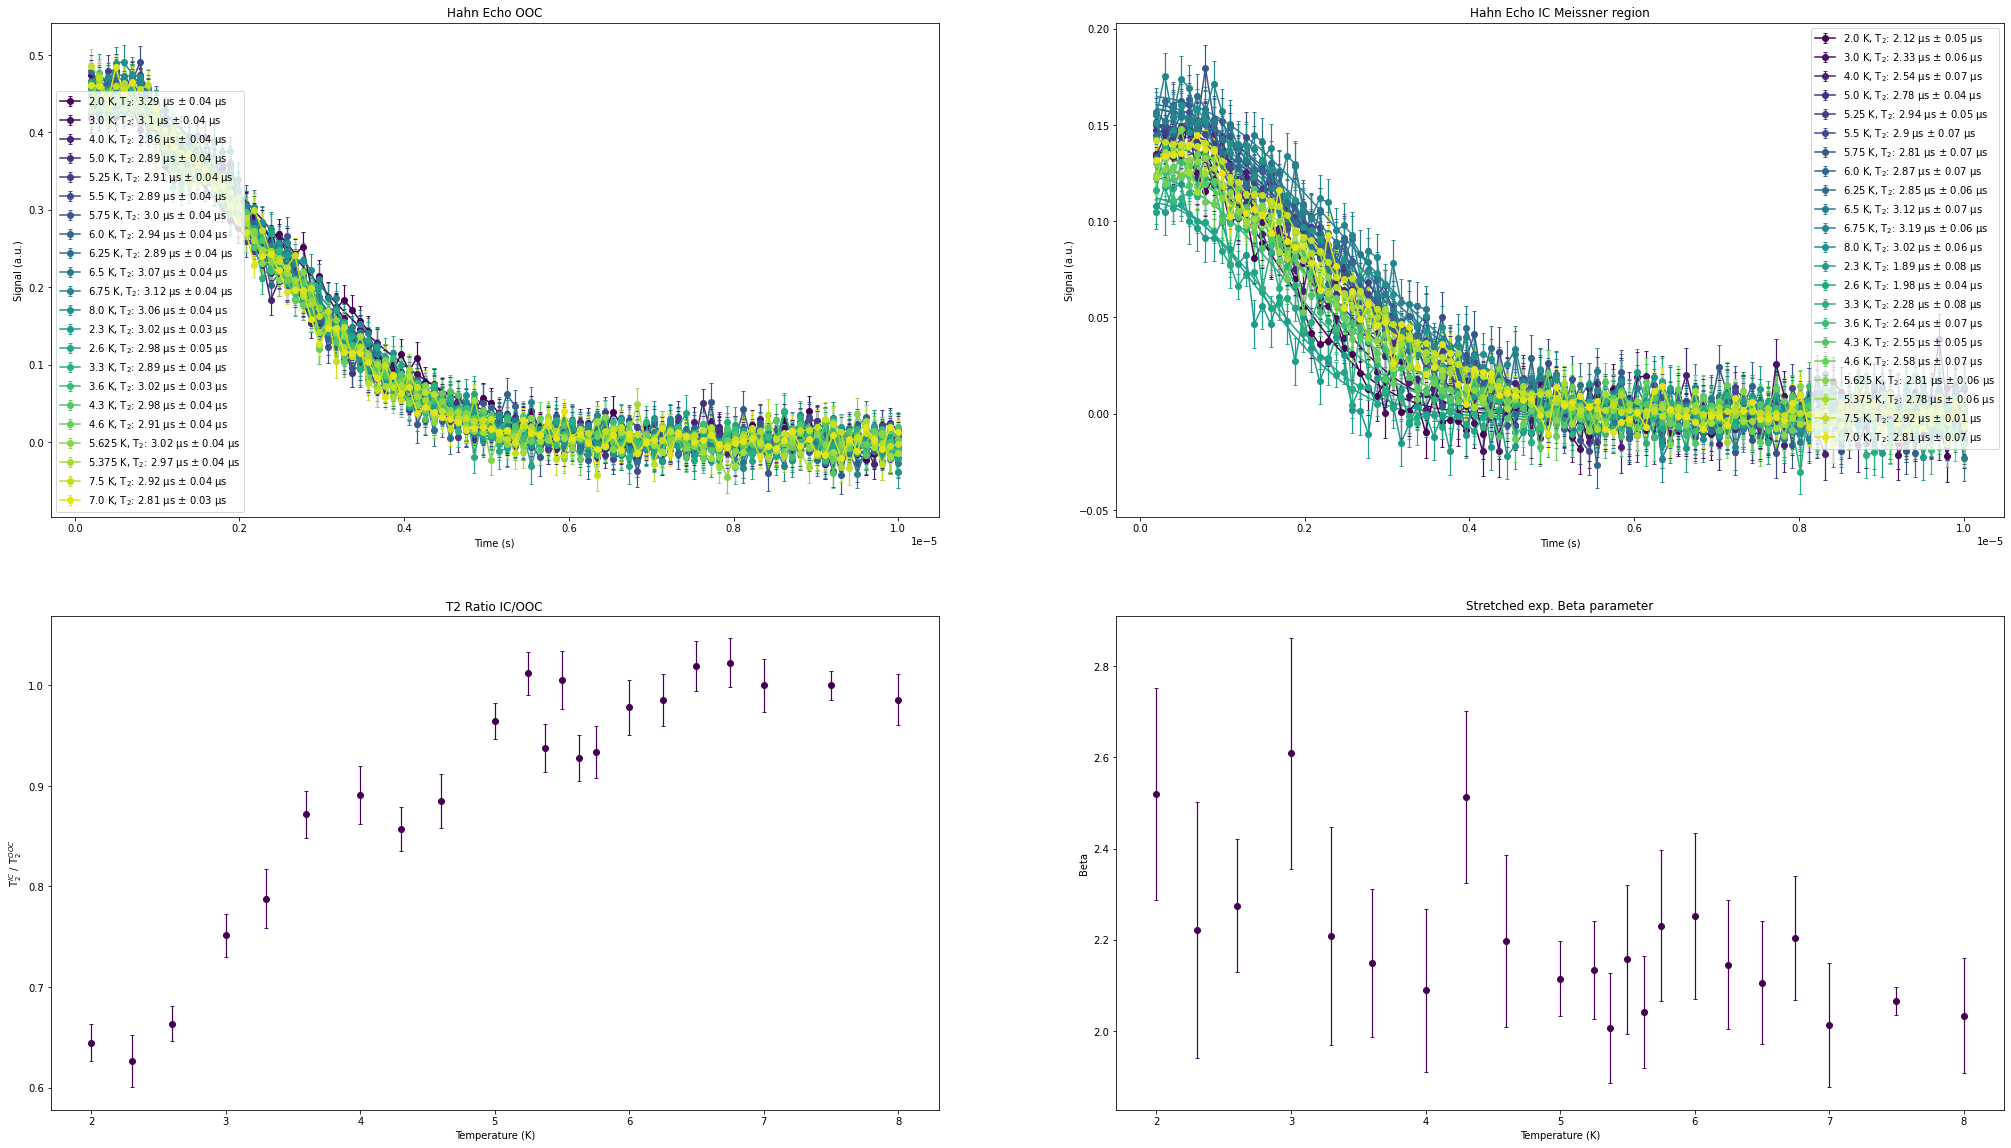

In [3]:
import matplotlib

temp = np.zeros(len(hechos_OOC_paths))
t2_OOC = np.zeros(len(hechos_OOC_paths))
t2_IC= np.zeros(len(hechos_IC_paths))
t2_OOC_err = np.zeros(len(hechos_OOC_paths))
t2_IC_err= np.zeros(len(hechos_IC_paths))
t2_IC_pow= np.zeros(len(hechos_IC_paths))
t2_IC_pow_err = np.zeros(len(hechos_IC_paths))

cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(hechos_OOC_paths))

fig = plt.figure(figsize=(35,20))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
# ax1.set_xscale('log')
# ax2.set_xscale('log')

axes = [ax1,ax2]
t2s = [t2_OOC, t2_IC]
t2s_err = [t2_OOC_err, t2_IC_err]

for idx, l in enumerate([hechos_OOC_paths, hechos_IC_paths]):
    for path_idx, path in enumerate(l):

        rgba = cmap(norm(path_idx))
        data_raw = np.loadtxt(path).T

        tempstr = re.search(r'\d\d?\d?\.?\d?\d?\d?K', path)

        t = float(tempstr.group()[:-1])
        temp[path_idx] = t 

        var_list = data_raw[0]

        mode = 'exp_decay_stretched'
        plot_option = 3 #1 = Signal1, 2 = Signal2, 3 = delta of signals
        err = None

        #Choose what to plot
        if plot_option == 3:
            data = data_raw[1] - data_raw[2]
            shift = (data_raw.shape[0]-1)//2
            err1 = abs(data_raw[1+shift])
            err2 = abs(data_raw[2+shift])
            err = err1+err2
        else:
            data = data_raw[plot_option]
            shift = (data_raw.shape[0]-1)//2
            err = data_raw[plot_option+shift]

        if mode == 'exp_decay_stretched':
            fit = afm_scanner_logic._fitlogic.make_decayexponentialstretched_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_decayexponentialstretched)
            lm,_ = fitlogic.make_decayexponentialstretched_model()
            leg = f"T$_2$: {round(fit.params['lifetime']*1e6,2)} µs $\pm$ {round(fit.params['lifetime'].stderr*1e6,2)} µs"
            axes[idx].set_xlabel('Time (s)')
            axes[idx].set_ylabel('Signal (a.u.)')

        #Plot Data an
        t2s[idx][path_idx] = fit.params['lifetime']
        t2s_err[idx][path_idx] = fit.params['lifetime'].stderr
        if idx==1:
            t2_IC_pow[path_idx] = fit.params['beta']
            t2_IC_pow_err[path_idx] = fit.params['beta'].stderr

        if not err is None:
            axes[idx].errorbar(x=var_list, y=data,
                         yerr=err, fmt='-o',
                         capsize=2, capthick=0.9,
                        elinewidth=1.2, label=f'{temp[path_idx]} K, '+leg, color=rgba)
        else:
            axes[idx].plot(var_list,data,'bo', label=temp[path_idx], color=rgba)

        x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
        axes[idx].plot(x, lm.eval(fit.params, x=x),'k-', color=rgba)
        axes[idx].legend()


# ax3.plot(temp, t2_OOC,color=cmap(norm(0)),label='OOC')
# ax3.plot(temp, t2_IC,color=cmap(norm(4)),label='IC')
# ax3.plot(temp, t2_IC/t2_OOC,color=cmap(norm(0)))
err = np.sqrt((t2_IC_err/t2_OOC)**2+(t2_IC/t2_OOC**2*t2_OOC_err)**2)
ax3.errorbar(x=temp, y=t2_IC/t2_OOC,
                yerr=err, fmt='o',
                capsize=2, capthick=0.9,
                elinewidth=1.2, color=cmap(norm(0)))
ax4.errorbar(x=temp, y=t2_IC_pow,
                yerr=t2_IC_pow_err, fmt='o',
                capsize=2, capthick=0.9,
                elinewidth=1.2, color=cmap(norm(0)))


ax3.set_xlabel('Temperature (K)')
ax3.set_ylabel('T$_2^{IC}$ / T$_2^{OOC}$')


ax4.set_xlabel('Temperature (K)')
ax4.set_ylabel('Beta')

ax1.title.set_text('Hahn Echo OOC')
ax2.title.set_text('Hahn Echo IC Meissner region')
ax3.title.set_text('T2 Ratio IC/OOC')
ax4.title.set_text('Stretched exp. Beta parameter')
        
plt.rcParams['figure.figsize'] = (9, 6)
fontsize = 12
plt.show()


G:\Data\Projects\NbSe2\AC studies\Set C\Substrate\20240208-1552-21_Hecho-alt-phased_A-T17-12_2.0K_200mT_Bnv_IC_substrate_Set_C_pulsed_measurement.dat


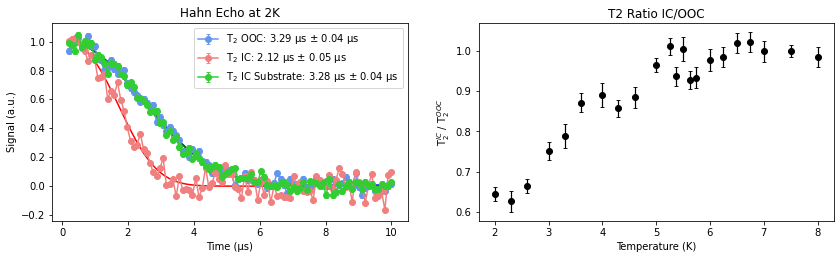

In [4]:
import matplotlib

temp = np.zeros(len(hechos_OOC_paths))
t2_OOC = np.zeros(len(hechos_OOC_paths))
t2_IC= np.zeros(len(hechos_IC_paths))
t2_OOC_err = np.zeros(len(hechos_OOC_paths))
t2_IC_err= np.zeros(len(hechos_IC_paths))
t2_IC_pow= np.zeros(len(hechos_IC_paths))
t2_IC_pow_err = np.zeros(len(hechos_IC_paths))

cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(hechos_OOC_paths))

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

# ax1.set_xscale('log')
# ax2.set_xscale('log')

axes = [ax1,ax2]
t2s = [t2_OOC, t2_IC]
t2s_err = [t2_OOC_err, t2_IC_err]

for idx, l in enumerate([hechos_OOC_paths, hechos_IC_paths]):
    for path_idx, path in enumerate(l):

        rgba = cmap(norm(path_idx))
        data_raw = np.loadtxt(path).T

        tempstr = re.search(r'\d\d?\d?\.?\d?\d?\d?K', path)

        t = float(tempstr.group()[:-1])
        temp[path_idx] = t 

        var_list = data_raw[0]

        mode = 'exp_decay_stretched'
        plot_option = 3 #1 = Signal1, 2 = Signal2, 3 = delta of signals
        err = None

        #Choose what to plot
        if plot_option == 3:
            data = data_raw[1] - data_raw[2]
            shift = (data_raw.shape[0]-1)//2
            err1 = abs(data_raw[1+shift])
            err2 = abs(data_raw[2+shift])
            err = err1+err2
        else:
            data = data_raw[plot_option]
            shift = (data_raw.shape[0]-1)//2
            err = data_raw[plot_option+shift]

        if mode == 'exp_decay_stretched':
            fit = afm_scanner_logic._fitlogic.make_decayexponentialstretched_fit(var_list*1e6,data,estimator=afm_scanner_logic._fitlogic.estimate_decayexponentialstretched)
            lm,_ = fitlogic.make_decayexponentialstretched_model()
            if idx == 0:    
                leg = f"T$_2$ OOC: {round(fit.params['lifetime'].value,2)} µs $\pm$ {round(fit.params['lifetime'].stderr,2)} µs"
            else:
                leg = f"T$_2$ IC: {round(fit.params['lifetime'].value,2)} µs $\pm$ {round(fit.params['lifetime'].stderr,2)} µs"
            ax1.set_xlabel('Time (µs)')
            ax1.set_ylabel('Signal (a.u.)')

        #Plot Data an
        t2s[idx][path_idx] = fit.params['lifetime']
        t2s_err[idx][path_idx] = fit.params['lifetime'].stderr
        if idx==1:
            t2_IC_pow[path_idx] = fit.params['beta']
            t2_IC_pow_err[path_idx] = fit.params['beta'].stderr

        if path_idx == 0:
            x = np.linspace(var_list[0]*1e6,var_list[-1]*1e6,10000, endpoint=True)
            fit_data = lm.eval(fit.params, x=x)
            fit_data_max = np.max(fit_data)

            if not err is None:
                ax1.errorbar(x=var_list*1e6, y=data/fit_data_max,
                             yerr=err, fmt='-o',
                             capsize=2, capthick=0.9,
                            elinewidth=1.2, label=leg, color='cornflowerblue' if idx == 0 else 'lightcoral')
            else:
                ax1.plot(var_list*1e6,data/fit_data_max,'bo', label=temp[path_idx], color='cornflowerblue' if idx == 0 else 'lightcoral')
                
            ax1.plot(x, fit_data/fit_data_max,'k-', color='blue' if idx == 0 else 'red')
            ax1.legend()



# ax3.plot(temp, t2_OOC,color=cmap(norm(0)),label='OOC')
# ax3.plot(temp, t2_IC,color=cmap(norm(4)),label='IC')
# ax3.plot(temp, t2_IC/t2_OOC,color=cmap(norm(0)))

#Analyse and plot substrate data
path = glob.glob(base_path + "Set C\\Substrate\\*_pulsed_measurement.dat")
data_raw = np.loadtxt(path[0]).T
var_list = data_raw[0]
mode = 'exp_decay_stretched'
plot_option = 3 #1 = Signal1, 2 = Signal2, 3 = delta of signals
err = None

#Choose what to plot
if plot_option == 3:
    data = data_raw[1] - data_raw[2]
    shift = (data_raw.shape[0]-1)//2
    err1 = abs(data_raw[1+shift])
    err2 = abs(data_raw[2+shift])
    err = err1+err2
else:
    data = data_raw[plot_option]
    shift = (data_raw.shape[0]-1)//2
    err = data_raw[plot_option+shift]

if mode == 'exp_decay_stretched':
    fit = afm_scanner_logic._fitlogic.make_decayexponentialstretched_fit(var_list*1e6,data,estimator=afm_scanner_logic._fitlogic.estimate_decayexponentialstretched)
    lm,_ = fitlogic.make_decayexponentialstretched_model()
    leg = f"T$_2$ IC Substrate: {round(fit.params['lifetime'].value,2)} µs $\pm$ {round(fit.params['lifetime'].stderr,2)} µs"

#Plot Data an
x = np.linspace(var_list[0]*1e6,var_list[-1]*1e6,10000, endpoint=True)
fit_data = lm.eval(fit.params, x=x)
fit_data_max = np.max(fit_data)

if not err is None:
    ax1.errorbar(x=var_list*1e6, y=data/fit_data_max,
                 yerr=err, fmt='-o',
                 capsize=2, capthick=0.9,
                elinewidth=1.2, label=leg, color='limegreen')
else:
    ax1.plot(var_list*1e6,data/fit_data_max,'bo', label=temp[path_idx], color='limegreen')

ax1.plot(x, fit_data/fit_data_max,'k-', color='green')
ax1.legend()


err = np.sqrt((t2_IC_err/t2_OOC)**2+(t2_IC/t2_OOC**2*t2_OOC_err)**2)
ax2.errorbar(x=temp, y=t2_IC/t2_OOC,
                yerr=err, fmt='o',
                capsize=2, capthick=0.9,
                elinewidth=1.2, color='black')
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('T$_2^{IC}$ / T$_2^{OOC}$')

ax1.title.set_text('Hahn Echo at 2K')
ax2.title.set_text('T2 Ratio IC/OOC')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

ind = np.argsort(temp)
temp = temp[ind]
t2_OOC = t2_OOC[ind]
t2_OOC_err = t2_OOC_err[ind]
t2_IC = t2_IC[ind]
t2_IC_err = t2_IC_err[ind]
err = err[ind]
meas_dict = {'temp':{'data':temp,'si_units': 'K'},
                't2_OOC':{'data':t2_OOC, 'err':t2_OOC_err, 'si_units': 's'},
                't2_IC':{'data':t2_IC, 'err':t2_IC_err, 'si_units': 's'},
                't2_ratio':{'data':t2_IC/t2_OOC, 'err':err, 'si_units': 's'}}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 7})
filepath = "G:\\Data\\Projects\\NbSe2\\AC studies\\Set C\\"
with open(filepath+'T2_fig_Set_C.pdf', 'wb') as f:
    plt.savefig(f,format='pdf')
plt.show()

with open(filepath+'Summary_Set_C'+'.pickle', 'wb') as f:
    pickle.dump(meas_dict, f)

In [5]:
base_path = "G:\\Data\\Projects\\NbSe2\\AC studies\\"
podmr_OOC_paths = glob.glob(base_path + "Set C\\PODMR\\*_OOC*_data_ch0_range0.dat")
podmr_IC_paths = glob.glob(base_path + "Set C\\PODMR\\*_IC*_data_ch0_range0.dat")

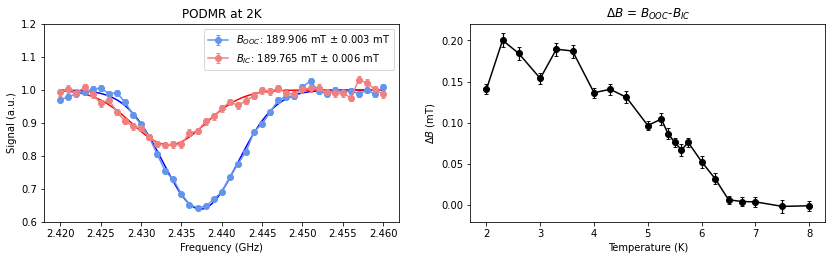

In [31]:
import matplotlib

temp = np.zeros(len(podmr_OOC_paths))
res_freq_OOC = np.zeros(len(podmr_OOC_paths))
res_freq_IC= np.zeros(len(podmr_IC_paths))
res_freq_OOC_err = np.zeros(len(podmr_OOC_paths))
res_freq_IC_err= np.zeros(len(podmr_IC_paths))
field_OOC = np.zeros(len(podmr_OOC_paths))
field_IC= np.zeros(len(podmr_IC_paths))
field_OOC_err = np.zeros(len(podmr_OOC_paths))
field_IC_err= np.zeros(len(podmr_IC_paths))


cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(podmr_OOC_paths))

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

gyro_nv = 28e9 #in Hz/T
e_field = 0 #in Hz
zero_field = 2.88e9 #in Hz, watch the Temperature

mode = 'gaussian_dip'
gslac = True
left = True

# ax1.set_xscale('log')
# ax2.set_xscale('log')

axes = [ax1,ax2]
res_freq = [res_freq_OOC, res_freq_IC]
res_freq_err = [res_freq_OOC_err, res_freq_IC_err]
field = [field_OOC, field_IC]
field_err = [field_OOC_err, field_IC_err]

for idx, l in enumerate([podmr_OOC_paths, podmr_IC_paths]):
    for path_idx, path in enumerate(l):

        rgba = cmap(norm(path_idx))
        data_raw = np.loadtxt(path).T

        tempstr = re.search(r'\d\d?\d?\.?\d?\d?\d?K', path)

        t = float(tempstr.group()[:-1])
        temp[path_idx] = t 

        var_list,data,err = (data_raw[0],data_raw[1],data_raw[2])

        fwhm_bias = 0
        contrast_bias = 0

        #Determine fit

        if mode == 'double':
            fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_dip)
            lm,_ = fitlogic.make_lorentziandouble_model()

        elif mode == 'N15':
            fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N15)
            lm,_ = fitlogic.make_lorentziandouble_model()

        elif mode == 'N14':
            fit = afm_scanner_logic._fitlogic.make_lorentziandouble_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentziandouble_N14)
            lm,_ = fitlogic.make_lorentziandouble_model()

        elif mode == 'gaussian_dip':
            fit = afm_scanner_logic._fitlogic.make_gaussian_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_gaussian_dip)
            lm,_ = fitlogic.make_gaussian_model()

        else:    
            fit = afm_scanner_logic._fitlogic.make_lorentzian_fit(var_list,data,estimator=afm_scanner_logic._fitlogic.estimate_lorentzian_dip)
            lm,_ = fitlogic.make_lorentzian_model()

        # print(fit.fit_report())
        res_freq[idx][path_idx] = fit.params['center'].value
        res_freq_err[idx][path_idx] = fit.params['center'].stderr

        if gslac == True and left == True:
            field[idx][path_idx] = np.sqrt(abs(res_freq[idx][path_idx] + zero_field)**2 - e_field**2) / gyro_nv
            field_err[idx][path_idx] = np.sqrt(((res_freq[idx][path_idx] + zero_field)/(gyro_nv*np.sqrt(abs(res_freq[idx][path_idx] + zero_field)**2 - e_field**2))*res_freq_err[idx][path_idx])**2)
        else:
            field[idx][path_idx] = np.sqrt(abs(res_freq[idx][path_idx] - zero_field)**2 - e_field**2) / gyro_nv
            field_err[idx][path_idx] = np.sqrt(((res_freq[idx][path_idx] - zero_field)/(gyro_nv*np.sqrt(abs(res_freq[idx][path_idx] - zero_field)**2 - e_field**2))*res_freq_err[idx][path_idx])**2)

        if idx == 0:    
            leg = "$B_{OOC}$: "+f"{round(field[idx][path_idx]*1e3,3)} mT $\pm$ {round(field_err[idx][path_idx]*1e3,3)} mT"
        else:
            leg = "$B_{IC}$: "+f"{round(field[idx][path_idx]*1e3,3)} mT $\pm$ {round(field_err[idx][path_idx]*1e3,3)} mT"
        ax1.set_xlabel('Frequency (GHz)')
        ax1.set_ylabel('Signal (a.u.)')
        #Plot Data
        if path_idx == 0:
            x = np.linspace(var_list[0],var_list[-1],10000, endpoint=True)
            fit_data = lm.eval(fit.params, x=x)
            fit_data_max = np.max(fit_data)

            if not err is None:
                ax1.errorbar(x=var_list/1e9, y=data/fit_data_max,
                             yerr=err, fmt='-o',
                             capsize=2, capthick=0.9,
                            elinewidth=1.2, label=leg, color='cornflowerblue' if idx == 0 else 'lightcoral')
            else:
                ax1.plot(var_list/1e9,data/fit_data_max,'bo', label=temp[path_idx], color='cornflowerblue' if idx == 0 else 'lightcoral')
                
            ax1.plot(x/1e9, fit_data/fit_data_max,'k-', color='blue' if idx == 0 else 'red')

ax1.title.set_text('PODMR at 2K')
ax1.legend(loc ='upper right')
ax1.set_ylim([0.6, 1.2])
ax2.title.set_text('$\Delta B$ = $B_{OOC}$-$B_{IC}$')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

ind = np.argsort(temp)
temp = temp[ind]
res_freq_OOC = res_freq_OOC[ind]
res_freq_IC= res_freq_IC[ind]
res_freq_OOC_err = res_freq_OOC_err[ind]
res_freq_IC_err= res_freq_IC_err[ind]
field_OOC = field_OOC[ind]
field_IC= field_IC[ind]
field_OOC_err = field_OOC_err[ind]
field_IC_err= field_IC_err[ind]
delta_field = field_OOC-field_IC
delta_field_err = np.sqrt(field_OOC_err**2+field_IC_err**2)

ax2.errorbar(x=temp, y=delta_field*1e3,
                             yerr=delta_field_err*1e3, fmt='-o',
                             capsize=2, capthick=0.9,
                            elinewidth=1.2, color='black')
ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel('$\Delta B$ (mT)')
meas_dict = {'temp':{'data':temp,'si_units': 'K'},
                'res_freq_OOC':{'data':res_freq_OOC, 'err':res_freq_OOC_err, 'si_units': 'Hz'},
                'res_freq_IC':{'data':res_freq_IC, 'err':res_freq_IC_err, 'si_units': 'Hz'},
                'field_OOC':{'data':field_OOC, 'err':field_OOC_err, 'si_units': 'T'},
                'field_IC':{'data':field_IC, 'err':field_IC_err, 'si_units': 'T'},
                'delta_field':{'data':delta_field, 'err':delta_field_err, 'si_units': 'T'}}

filepath = "G:\\Data\\Projects\\NbSe2\\AC studies\\Set C\\PODMR\\"
with open(filepath+'PODMR_Fig_Set_C.pdf', 'wb') as f:
    plt.savefig(f,format='pdf')
plt.show()

with open(filepath+'PODMR_Summary_Set_C'+'.pickle', 'wb') as f:
    pickle.dump(meas_dict, f)